# Clean And Analyze Employee Exit Surveys

#### We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

#### In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following: 

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?




#### Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

#### Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Ins

In [54]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dete_survey = pd.read_csv('~/Desktop/dete_survey.csv')

In [5]:
tafe_survey = pd.read_csv('~/Desktop/tafe_survey.csv',header=0,encoding = 'unicode_escape')

In [6]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [10]:
dete_survey.isnull().sum().sort_values()

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

In [11]:
tafe_survey.isnull().sum().sort_values()

Record ID                                                             0
Institute                                                             0
WorkArea                                                              0
Reason for ceasing employment                                         1
CESSATION YEAR                                                        7
                                                                   ... 
Contributing Factors. Career Move - Public Sector                   265
Contributing Factors. Maternity/Family                              265
Contributing Factors. Ill Health                                    265
InductionInfo. Topic:Did you undertake a Corporate Induction?       270
Main Factor.     Which of these was the main factor for leaving?    589
Length: 72, dtype: int64

In [12]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [13]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

#### Read the dete_survey.csv CSV file into pandas again, but this time read the Not Stated values in as NaN.

In [14]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = "Not Stated")

#### Let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [15]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],1)

In [16]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],1)

#### Rename columns of the dete_survey

- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [17]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()

In [18]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### Rename columns of the tafe_survey

In [19]:
tafe_survey_updated = tafe_survey_updated.rename(columns={"Record ID":"id",
    "CESSATION YEAR":"cease_date",
    "Reason for ceasing employment":"separationtype",
    "Gender. What is your Gender?":"gender",
    "CurrentAge. Current Age":"age",
    "Employment Type. Employment Type":"employment_status",
    "Classification. Classification":"position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service"
,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [20]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

####  For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'. The dete_survey_updated dataframe contains three Resignation separation types. We want to select all of them. 

In [21]:
dete_resign_bool = dete_survey_updated["separationtype"].str.contains("Resignation").copy()

In [22]:
dete_resignations = dete_survey_updated[dete_resign_bool]

#### Tafe's case is same with dete's case. However we should remove the rows with NA in tafe-erign_bool and tafe_survey_updated. If we don't remove the row with NA, tafe_resign_bool won't work with the tafe_survey_updated. Boolean is not working with NA value.

In [23]:
tafe_resign_bool = tafe_survey_updated["separationtype"].str.contains("Resignation").copy()

In [24]:
np.where(tafe_survey_updated['separationtype'].isnull())

(array([324]),)

In [25]:
tafe_survey_updated = tafe_survey_updated.drop([324], 0)

In [26]:
tafe_resign_bool = tafe_resign_bool.dropna()

In [27]:
tafe_resignations = tafe_survey_updated[tafe_resign_bool]

#### Extract only year from the cease_date of the dete_resignations

In [28]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [29]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract('([1-2][0-9]{3})').astype('float')

In [30]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

#### It seems that cease_date of the tafe_resignations are already cleaned

In [31]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [32]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### For dete_resignations, we have to calcualte the length of time the employee spent in their workplace. To do that, we can subtract the dete_start_date from the cease_date and assingn the result to a new column named institute_service.

In [33]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

In [34]:
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

#### If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

#### To create the new column, we'll do the following:

#### Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values. If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the DataFrame.any() method to do the following:

- Return True if any element in the selected columns above is True
- Return False if none of the elements in the selected columns above is True
- Return NaN if the value is NaN

In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
def update_vals(a):
    if pd.isnull(a) :
        return np.nan 
    elif a == '-':
        return False
    else:
        return True

In [60]:
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [63]:
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


#### First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [40]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#### Combine the dataframes. 

In [41]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

In [42]:
combined.isnull().sum()

Classification.     Classification                     361
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Ill Health                       319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Maternity/Family                 319
Contributing Factors. NONE                             319
Contributing Factors. Other                            319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
CurrentAge.     Current Age                            361
Employment Type.     Employment Type                   361
Gender.     What is your Gender?                       361
Institute                                              3

#### Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Drop any columns with less than 500 non null values.

In [43]:
combined_updated = combined.dropna(thresh= 500, axis=1)

In [44]:
combined_updated.isnull().sum()

cease_date           16
dissatisfied          8
id                    0
institute             0
institute_service    88
separationtype        0
dtype: int64

#### To analyze the institue_service, we'll convert these numbers into categories.
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [66]:
combined_updated['institute_service']

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

In [46]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")

In [47]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype('float')

In [67]:
def cat(a) :
    if pd.isnull(a):
        return np.nan
    elif a >= 11:
        return "Veteran"
    elif 7<= a <= 10:
        return "Established"
    elif 3 <=a <= 6 :
        return "Experiened"
    else:
        return "New"

In [49]:
combined_updated['service_cat'] = combined_updated["institute_service"].apply(cat)

#### Replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False

In [50]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [51]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value=False)

#### Use the pivot table method to calculate the percentage of dissatisfied employees in each service_cat group. And plot bar grpag for each category. 

In [69]:
pv_dissatisfied = combined_updated.pivot_table(index="service_cat", values="dissatisfied")
pv_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experiened,0.343023
New,0.295337
Veteran,0.485294


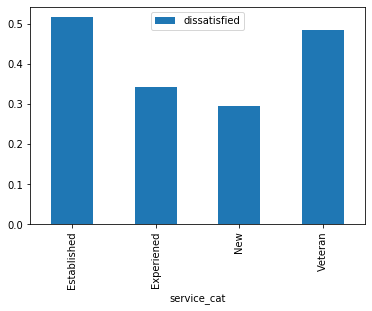

In [68]:
%matplotlib inline
pv_dissatisfied.plot(kind="bar")

### Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

#### Based on the analysis, employees who have been there longer is likely to resign their job due to some kind of dissatisfaction. Suppose that we can split into two groups: a group where employeees have only worked for a short period of time (New and Experienced) and the other group where employees who have work for a longer period of time (Established and Veteran). You can see that the latter is more likely to resign due to some kind of dissatisfaction.